# Simulate the Predator Game

In [1]:
from environment import Predator
from agent import RandomAgent, QLearner
from HystereticQLearner import HystereticQLearner
from boltzmann import selection as boltzmann_policy
from utils import simulate_task
import matplotlib.pyplot as plt
import numpy as np
import random
import cProfile
random.seed()


## Test Bed

In [5]:
# Simulate
## Parameters

exploration_rate = 0.1
def discount_rate(_): return 0
def learning_rate(_): return 0.1
def decrease_rate(_): return 0.01


num_simulations = 1
trials = 1000
timesteps = 1000



In [6]:
# Simulate
# profiler to check program time
def test():
    task = Predator()

    # rewards = np.zeros((num_simulations, timesteps))
    captures = np.zeros((num_simulations, trials))

    for i in range(num_simulations):
        # print("#------------------------#")
        # print("| Simulation {}          |".format(i))
        # print("#------------------------#")
        agents = [HystereticQLearner(task, exploration_rate, learning_rate,
                    discount_rate, decrease_rate),
                    HystereticQLearner(task, exploration_rate, learning_rate,
                    discount_rate, decrease_rate)]
        
        for j in range(trials):
            t = 0
            task.resetCaptues()
            
            while(t < timesteps):
                t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
                # rewards[i][t - 1] = agents[0].accumulated_reward
                agents[0].accumulated_reward = 0
            captures[i][j] += task.captureCount
            # print("#------------------------#")
            # print("| Trial: {}              |".format(j))
            # print("| Captues: {}            |".format(task.captureCount))
            # print("#------------------------#")


cProfile.run("test()")


         829688044 function calls in 569.400 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.354    0.354  569.395  569.395 3948013051.py:3(test)
 20000000    2.755    0.000    2.755    0.000 4007000790.py:5(discount_rate)
 19874605    2.736    0.000    2.736    0.000 4007000790.py:6(learning_rate)
   125395    0.028    0.000    0.028    0.000 4007000790.py:7(decrease_rate)
        1    0.005    0.005  569.400  569.400 <string>:1(<module>)
 20000000    9.328    0.000    9.328    0.000 HystereticQLearner.py:18(get_q_value)
 20000000   23.290    0.000   42.914    0.000 HystereticQLearner.py:21(get_max_q_value)
 20000000    9.756    0.000    9.756    0.000 HystereticQLearner.py:24(set_q_value)
 20000000   44.912    0.000  112.428    0.000 HystereticQLearner.py:27(update)
        2    0.029    0.015    0.034    0.017 HystereticQLearner.py:35(init_action_values)
        2    0.000    0.000    0.034    0.017 Hyster

Text(0, 0.5, 'Average Captures')

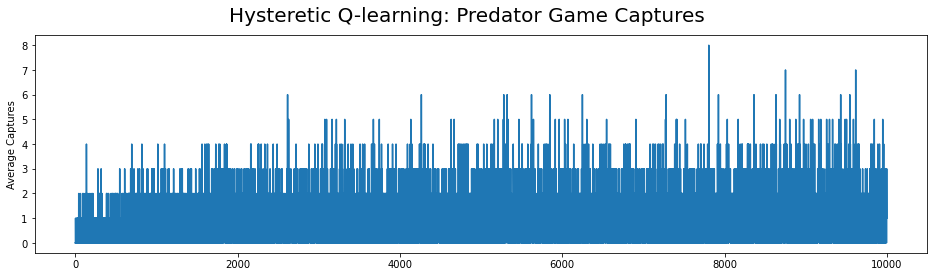

In [7]:
captures_fig = plt.figure(figsize=(16, 4))
plt.plot(range(trials), np.average(captures, axis=0))
captures_fig.suptitle('Hysteretic Q-learning: Predator Game Captures', fontsize=20)
plt.ylabel('Average Captures')


Text(0, 0.5, 'Average reward')

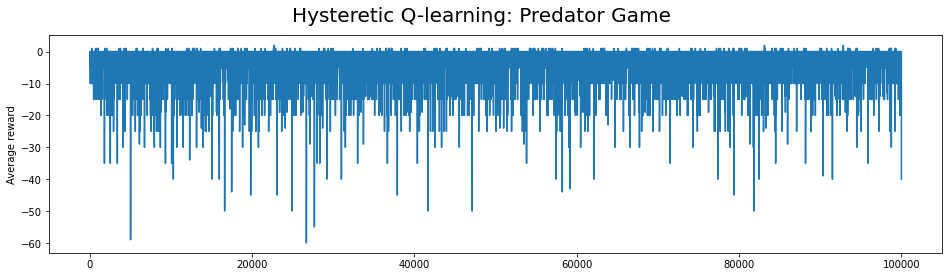

In [19]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(rewards, axis=0))
plt.plot(range(timesteps), np.average(rewards, axis=0))
fig.suptitle('Hysteretic Q-learning: Predator Game', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

random_agents = (RandomAgent(task), RandomAgent(task))

num_games = 1263
num_simulations = 500
random_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(random_agents, task, t)
        random_rewards[i][t - 1] = random_agents[0].accumulated_reward
        random_agents[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

#------------------------#
| Simulation 0          |
#------------------------#
#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulatio

Text(0, 0.5, 'Average reward')

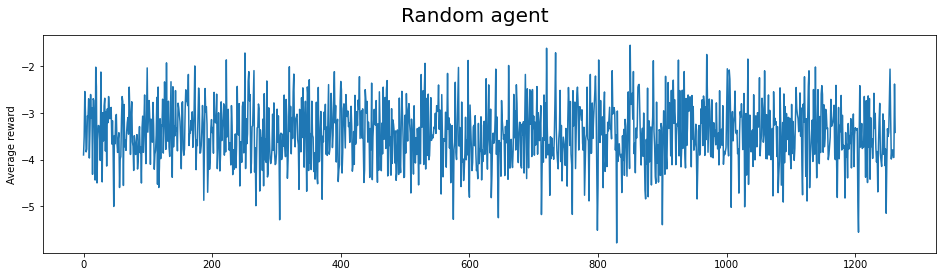

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(random_rewards, axis=0))
plt.plot(range(num_games), np.average(random_rewards, axis=0))
fig.suptitle('Random agent', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

q_learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy))

num_games = 1263
num_simulations = 1
q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(q_learners, task, t, T)
        q_learn_rewards[i][t - 1] = q_learners[0].accumulated_reward
        q_learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

#------------------------#
| Simulation 0          |
#------------------------#
#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulatio

Text(0, 0.5, 'Average reward')

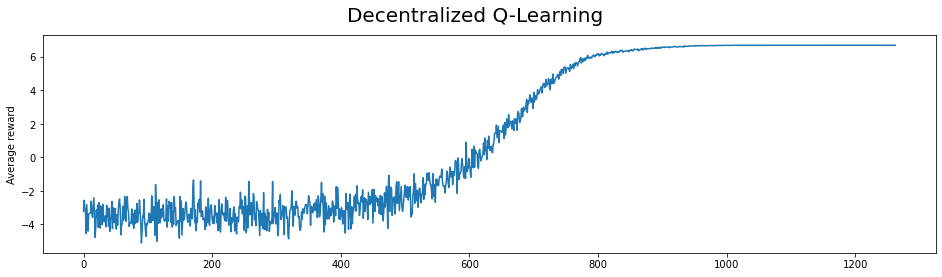

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(q_learn_rewards, axis=0))
plt.plot(range(num_games), np.average(q_learn_rewards, axis=0))
fig.suptitle('Decentralized Q-Learning', fontsize=20)
plt.ylabel('Average reward')

## Test with a "dumb" agent

In [ ]:
from agent import FixedAgent

task = ClimbingGame()


import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

agents = (HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy), 
          FixedAgent(task, 'A'))

num_games = 1263
num_simulations = 500
base_line_rewards = np.zeros((num_simulations, num_games))



for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")
    T = 5000
    t = 0
    while(t < num_games):
            t, T = simulate_task(agents, task, t, T)
            base_line_rewards[i][t - 1] = agents[0].accumulated_reward
            agents[0].accumulated_reward = 0

#------------------------#
| Simulation 0          |
#------------------------#
#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulatio

#------------------------#
| Simulation 102          |
#------------------------#
#------------------------#
| Simulation 103          |
#------------------------#
#------------------------#
| Simulation 104          |
#------------------------#
#------------------------#
| Simulation 105          |
#------------------------#
#------------------------#
| Simulation 106          |
#------------------------#
#------------------------#
| Simulation 107          |
#------------------------#
#------------------------#
| Simulation 108          |
#------------------------#
#------------------------#
| Simulation 109          |
#------------------------#
#------------------------#
| Simulation 110          |
#------------------------#
#------------------------#
| Simulation 111          |
#------------------------#
#------------------------#
| Simulation 112          |
#------------------------#
#------------------------#
| Simulation 113          |
#------------------------#
#---------------

#------------------------#
| Simulation 202          |
#------------------------#
#------------------------#
| Simulation 203          |
#------------------------#
#------------------------#
| Simulation 204          |
#------------------------#
#------------------------#
| Simulation 205          |
#------------------------#
#------------------------#
| Simulation 206          |
#------------------------#
#------------------------#
| Simulation 207          |
#------------------------#
#------------------------#
| Simulation 208          |
#------------------------#
#------------------------#
| Simulation 209          |
#------------------------#
#------------------------#
| Simulation 210          |
#------------------------#
#------------------------#
| Simulation 211          |
#------------------------#
#------------------------#
| Simulation 212          |
#------------------------#
#------------------------#
| Simulation 213          |
#------------------------#
#---------------

#------------------------#
| Simulation 302          |
#------------------------#
#------------------------#
| Simulation 303          |
#------------------------#
#------------------------#
| Simulation 304          |
#------------------------#
#------------------------#
| Simulation 305          |
#------------------------#
#------------------------#
| Simulation 306          |
#------------------------#
#------------------------#
| Simulation 307          |
#------------------------#
#------------------------#
| Simulation 308          |
#------------------------#
#------------------------#
| Simulation 309          |
#------------------------#
#------------------------#
| Simulation 310          |
#------------------------#
#------------------------#
| Simulation 311          |
#------------------------#
#------------------------#
| Simulation 312          |
#------------------------#
#------------------------#
| Simulation 313          |
#------------------------#
#---------------

#------------------------#
| Simulation 402          |
#------------------------#
#------------------------#
| Simulation 403          |
#------------------------#
#------------------------#
| Simulation 404          |
#------------------------#
#------------------------#
| Simulation 405          |
#------------------------#
#------------------------#
| Simulation 406          |
#------------------------#
#------------------------#
| Simulation 407          |
#------------------------#
#------------------------#
| Simulation 408          |
#------------------------#
#------------------------#
| Simulation 409          |
#------------------------#
#------------------------#
| Simulation 410          |
#------------------------#
#------------------------#
| Simulation 411          |
#------------------------#
#------------------------#
| Simulation 412          |
#------------------------#
#------------------------#
| Simulation 413          |
#------------------------#
#---------------

Text(0, 0.5, 'Average reward')

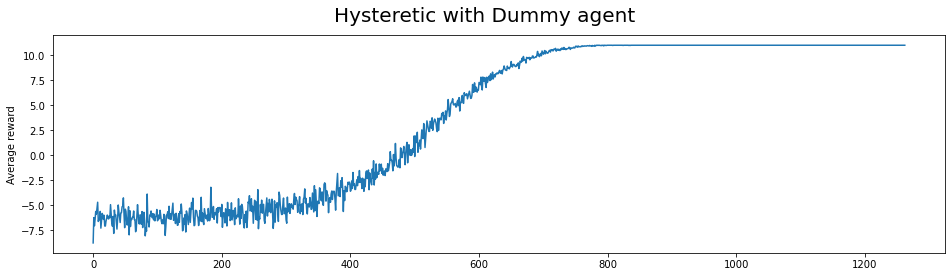

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(num_games), np.average(base_line_rewards, axis=0))
fig.suptitle('Hysteretic with Dummy agent', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), 
              FixedAgent(task, 'A'))

num_games = 1263
num_simulations = 500
baseline_q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(learners, task, t, T)
        baseline_q_learn_rewards[i][t - 1] = learners[0].accumulated_reward
        learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

#------------------------#
| Simulation 0          |
#------------------------#
#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulatio

#------------------------#
| Simulation 102          |
#------------------------#
#------------------------#
| Simulation 103          |
#------------------------#
#------------------------#
| Simulation 104          |
#------------------------#
#------------------------#
| Simulation 105          |
#------------------------#
#------------------------#
| Simulation 106          |
#------------------------#
#------------------------#
| Simulation 107          |
#------------------------#
#------------------------#
| Simulation 108          |
#------------------------#
#------------------------#
| Simulation 109          |
#------------------------#
#------------------------#
| Simulation 110          |
#------------------------#
#------------------------#
| Simulation 111          |
#------------------------#
#------------------------#
| Simulation 112          |
#------------------------#
#------------------------#
| Simulation 113          |
#------------------------#
#---------------

#------------------------#
| Simulation 202          |
#------------------------#
#------------------------#
| Simulation 203          |
#------------------------#
#------------------------#
| Simulation 204          |
#------------------------#
#------------------------#
| Simulation 205          |
#------------------------#
#------------------------#
| Simulation 206          |
#------------------------#
#------------------------#
| Simulation 207          |
#------------------------#
#------------------------#
| Simulation 208          |
#------------------------#
#------------------------#
| Simulation 209          |
#------------------------#
#------------------------#
| Simulation 210          |
#------------------------#
#------------------------#
| Simulation 211          |
#------------------------#
#------------------------#
| Simulation 212          |
#------------------------#
#------------------------#
| Simulation 213          |
#------------------------#
#---------------

#------------------------#
| Simulation 302          |
#------------------------#
#------------------------#
| Simulation 303          |
#------------------------#
#------------------------#
| Simulation 304          |
#------------------------#
#------------------------#
| Simulation 305          |
#------------------------#
#------------------------#
| Simulation 306          |
#------------------------#
#------------------------#
| Simulation 307          |
#------------------------#
#------------------------#
| Simulation 308          |
#------------------------#
#------------------------#
| Simulation 309          |
#------------------------#
#------------------------#
| Simulation 310          |
#------------------------#
#------------------------#
| Simulation 311          |
#------------------------#
#------------------------#
| Simulation 312          |
#------------------------#
#------------------------#
| Simulation 313          |
#------------------------#
#---------------

#------------------------#
| Simulation 402          |
#------------------------#
#------------------------#
| Simulation 403          |
#------------------------#
#------------------------#
| Simulation 404          |
#------------------------#
#------------------------#
| Simulation 405          |
#------------------------#
#------------------------#
| Simulation 406          |
#------------------------#
#------------------------#
| Simulation 407          |
#------------------------#
#------------------------#
| Simulation 408          |
#------------------------#
#------------------------#
| Simulation 409          |
#------------------------#
#------------------------#
| Simulation 410          |
#------------------------#
#------------------------#
| Simulation 411          |
#------------------------#
#------------------------#
| Simulation 412          |
#------------------------#
#------------------------#
| Simulation 413          |
#------------------------#
#---------------

Text(0, 0.5, 'Average reward')

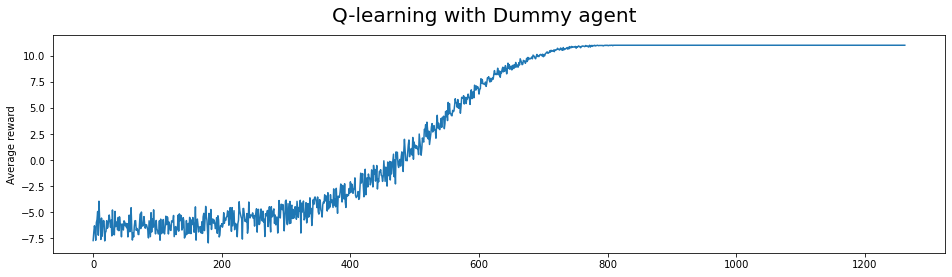

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(num_games), np.average(baseline_q_learn_rewards, axis=0))
fig.suptitle('Q-learning with Dummy agent', fontsize=20)
plt.ylabel('Average reward')